# Short Term Rentals in Toronto: Python Visualizations

#### Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests
import plotly.graph_objects as go # 'go' is 'graph objects’

#### Load dataset

In [3]:
str_df = pd.read_csv("./data/short-term-rental-registrations-data.csv")

In [4]:
str_df.head()

,_id,operator_registration_number,address,unit,postal_code,property_type,ward_number,ward_name
0,3269148,STR-2206-FHYKVB,832 Bay St,5010,M5S,Condominium,11.0,University-Rosedale
1,3269149,STR-2211-JBBBHZ,137 Danforth Ave,4,M4K,Apartment,14.0,Toronto-Danforth
2,3269150,STR-2302-GBXRVR,187 Downsview Park Blvd,NaN,M3K,Townhouse/ Row House,6.0,York Centre
3,3269151,STR-2405-FHXKVP,159 Marlborough Pl,NaN,M5R,Single/Semi-detached House,11.0,University-Rosedale
4,3269152,STR-2201-HTSDVL,20 John St,622,M5V,Condominium,10.0,Spadina-Fort York


#### Data Preparation

In [ ]:
# Data grouped by ward_name to count the number of entries per each ward
df = str_df.groupby('ward_name', as_index = False).count()
df.shape

(25, 8)

In [56]:
# Filter top 10 wards with higher number of properties registered 
df1 = df.sort_values(by='_id', ascending=False).head(10)
df1[['ward_name','ward_number']]

,ward_name,ward_number
17,Spadina-Fort York,2460
18,Toronto Centre,749
21,University-Rosedale,671
1,Davenport,601
19,Toronto-Danforth,467
0,Beaches-East York,387
10,Parkdale-High Park,372
8,Etobicoke-Lakeshore,338
22,Willowdale,308
20,Toronto-St. Paul's,265


## Visualization Using MatplotLib

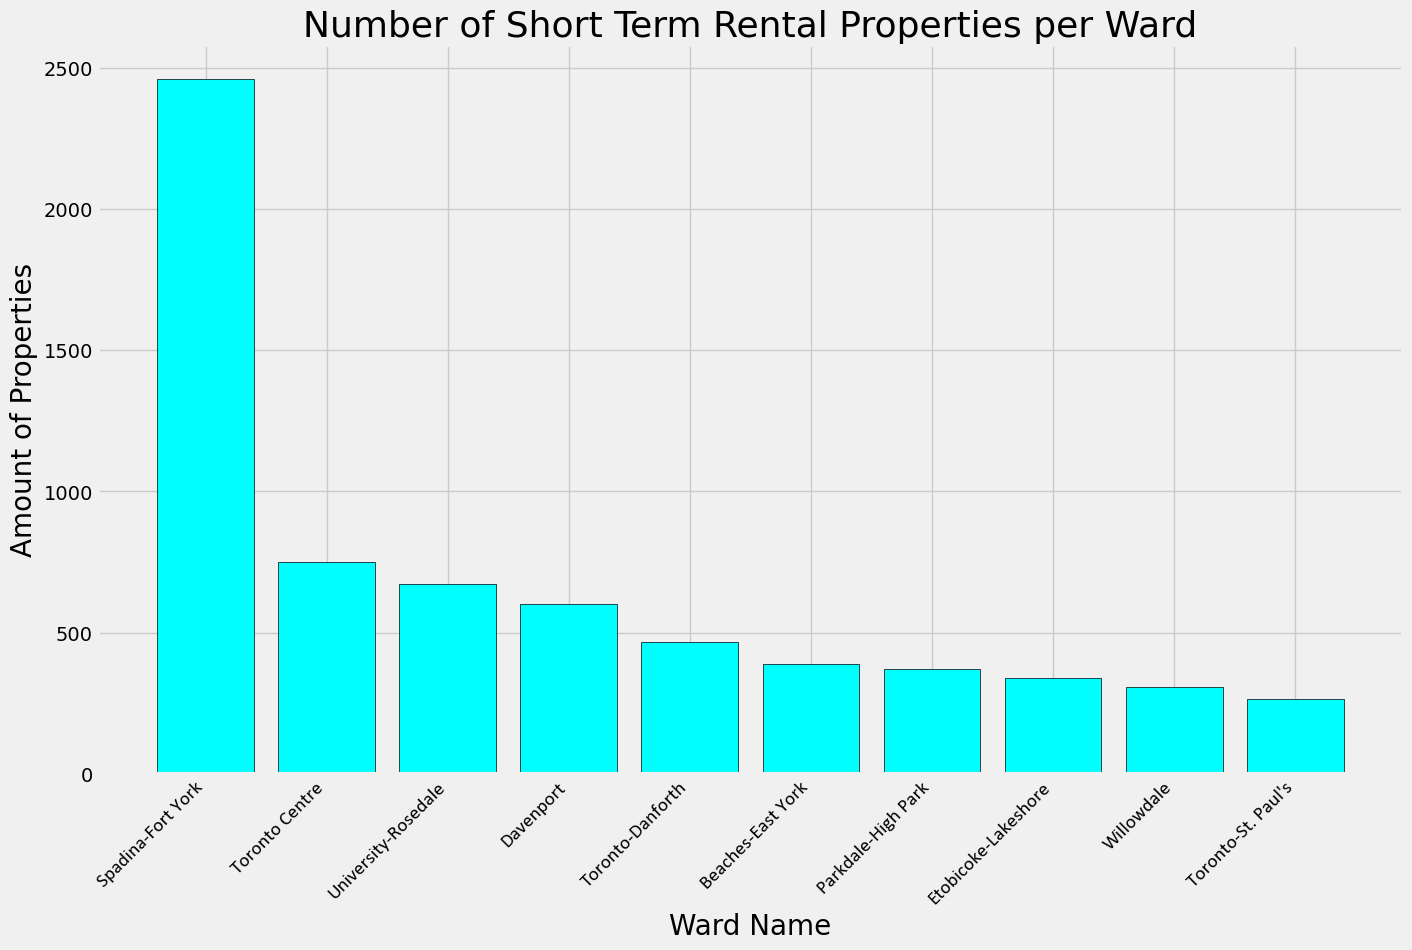

In [57]:
# Define data
x1 = df1['ward_name']
y1 = df1['ward_number']

# Make a plot bar
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(x1,y1, color='cyan', edgecolor='black')

# Container for image
plt.xticks(rotation=45, # 45 degrees rotation
            ha='right',
            fontsize = 22,
            font = "calibri") 
ax.set_title('Number of Short Term Rental Properties per Ward', fontsize=26)
ax.set_xlabel('Ward Name',fontsize=20)
ax.set_ylabel('Amount of Properties',fontsize=20)
plt.style.use('fivethirtyeight')

## Visualization Using Plotly

In [49]:
# Make figure
graph = go.Figure()

# Select Plot type (bar) and data
graph.add_trace(go.Bar(x=x1, y=y1))

# Layout update to include titles
graph.update_layout(
title="Short Term Rental Statistics",
xaxis_title="Ward Name",
yaxis_title="Amount of Properties")